In [18]:
#Resource/Source Code:https://www.youtube.com/watch?v=7HPwo4wnJeA

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
#https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 10)

In [20]:
print(X_train.shape) #60,000 images, with size 28*28
print(X_test.shape)

(60000, 28, 28)
(5000, 28, 28)


In [21]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Text(0.5, 0, 'Shirt')

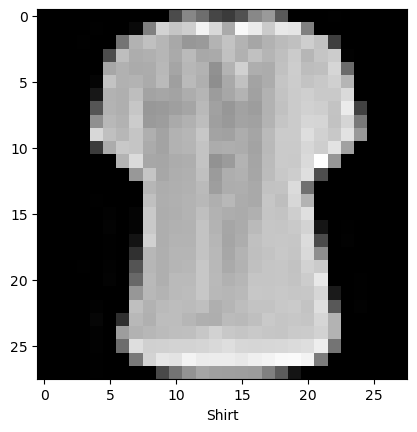

In [22]:
plt.imshow(X_train[55], cmap = 'gray')
plt.xlabel(classes[y_train[55]]) #Show image and the corresponding label

In [23]:
#Lets build our model
cnn = tf.keras.models.Sequential([
    
    #feature extraction
    layers.Conv2D(filters = 32, kernel_size = (2,2), activation = 'relu', input_shape=(28,28,1)), #the number of filters/features that we want or nueral network to use(i.e one filter may be the left half of the dress)
                                #the kernal size is dimensionality of the convultional filter, 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    #classification
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])


In [24]:
cnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = "sparse_categorical_crossentropy" ,
              metrics = ['accuracy'])

cnn.fit(X_train,y_train,batch_size = 32, epochs = 10, validation_data = [X_val, y_val])

Epoch 1/10
 207/1875 [==>...........................] - ETA: 24s - loss: 2.3182 - accuracy: 0.3078

KeyboardInterrupt: 

In [25]:


cnn.evaluate(X_test, y_test)

157/157 [==============================] - 1s 5ms/step - loss: 1.7338 - accuracy: 0.3762


[1.7338368892669678, 0.37619999051094055]

Text(0.5, 0, 'Pullover')

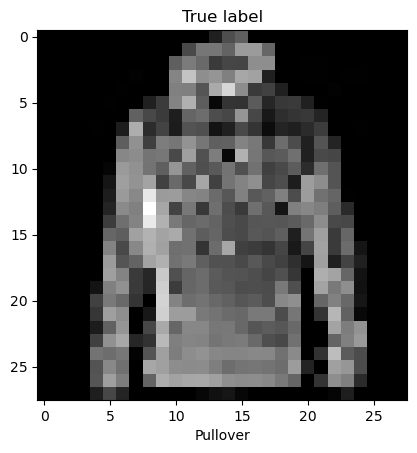

In [26]:
plt.title("True label")
plt.imshow(X_test[2],cmap='gray')
plt.xlabel(classes[y_test[2]]) #Show image and the corresponding label



In [27]:
y_pred = cnn.predict(X_test) #use model to predict labels of images

print(y_pred.shape) #y_pred has 10 columns which each represents the probability of it being that class 

y_pred_label = [np.argmax(element)  for element in y_pred] #finds the index/class which as the highest probability and assings it to that class(i.e if ankle boot has the highest probability it will be assigned to 9) )


print(y_test[:10])
print(y_pred_label[:10])

157/157 [==============================] - 1s 5ms/step
(5000, 10)
[0 0 2 1 2 8 8 6 3 5]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 5]


Text(0.5, 0, 'Coat')

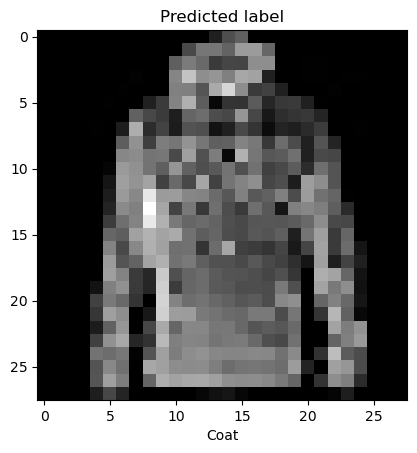

In [13]:
plt.title("Predicted label")
plt.imshow(X_test[2],cmap='gray')
plt.xlabel(classes[y_pred_label[2]]) #Show image and the corresponding label